In [1]:
import pandas as pd 
import numpy as np

In [2]:
import pandas as pd

df = pd.read_csv("C:/Users/DELL/machine-learning-projects/sms-classifier-project/spam.csv", encoding="ISO-8859-1")


In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3614,ham,I enjoy watching and playing football and bask...,NaN,NaN,NaN
82,ham,Ok i am on the way to home hi hi,NaN,NaN,NaN
2109,ham,Lara said she can loan me &lt;#&gt; .,NaN,NaN,NaN
2103,ham,Its a site to simulate the test. It just gives...,NaN,NaN,NaN
931,ham,Congratulations ore mo owo re wa. Enjoy it and...,NaN,NaN,NaN


## 1. Data Cleaning


In [4]:
df.shape

(5572, 5)

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
# drop unwanted columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [7]:
df.sample(5)

,v1,v2
1342,ham,Yeah I'll try to scrounge something up
2820,ham,Oh god..taken the teeth?is it paining
524,spam,"URGENT!: Your Mobile No. was awarded a å£2,000..."
3032,ham,"Aight, lemme know what's up"
145,ham,Whats the staff name who is taking class for us?


In [8]:
# renaming columns
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)


,target,text
4495,ham,"In case you wake up wondering where I am, I fo..."
4512,spam,Money i have won wining number 946 wot do i do...
967,ham,What do u want when i come back?.a beautiful n...
2154,ham,Oh god i am happy to see your message after 3 ...
3751,ham,Why are u up so early?


In [9]:
# encoding target column
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [10]:
df['target']=encoder.fit_transform(df['target'])

In [11]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
df.isnull().sum()



target    0
text      0
dtype: int64

In [13]:
df.duplicated().sum()

np.int64(403)

In [14]:
df=df.drop_duplicates(keep='first')


In [15]:
df.duplicated().sum()

np.int64(0)

In [16]:
df.shape

(5169, 2)

## 2.EDA

In [17]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [18]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

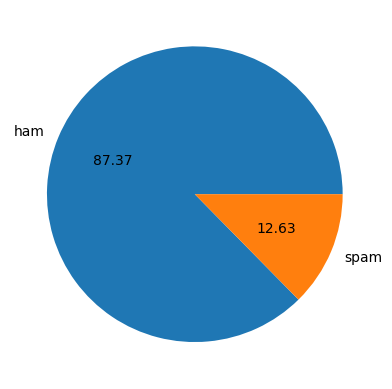

In [19]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [20]:
#DATA is imbalanced

In [21]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\DELL/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [22]:
df['num_characters'] = df['text'].apply(len)

In [23]:
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [24]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [25]:
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [26]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [27]:
#ham
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [28]:
#spam
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [29]:
!pip install seaborn


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [30]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

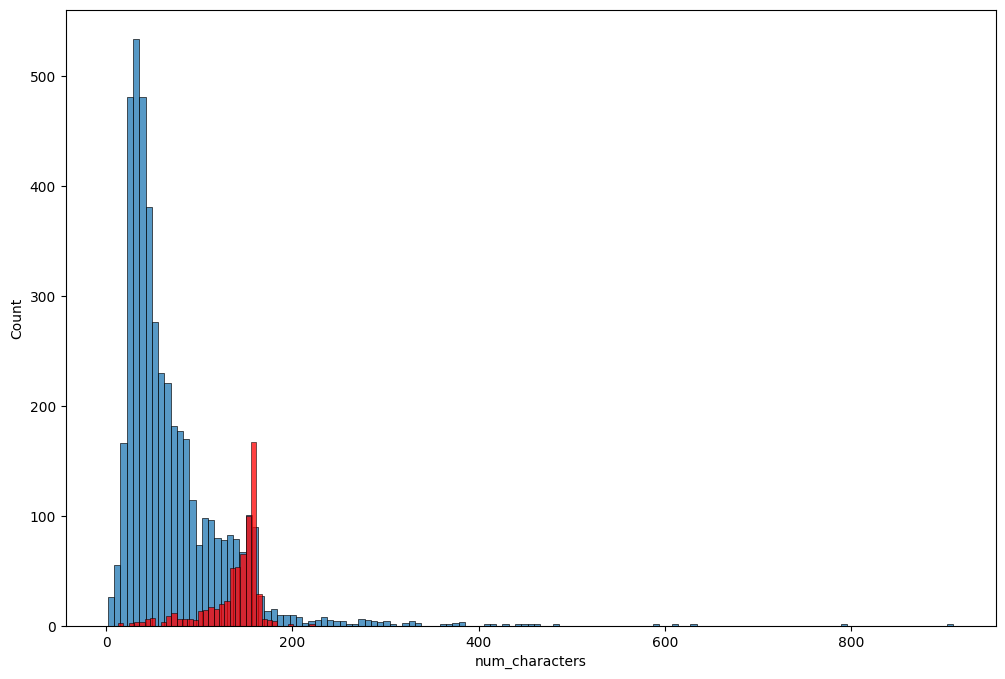

In [31]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

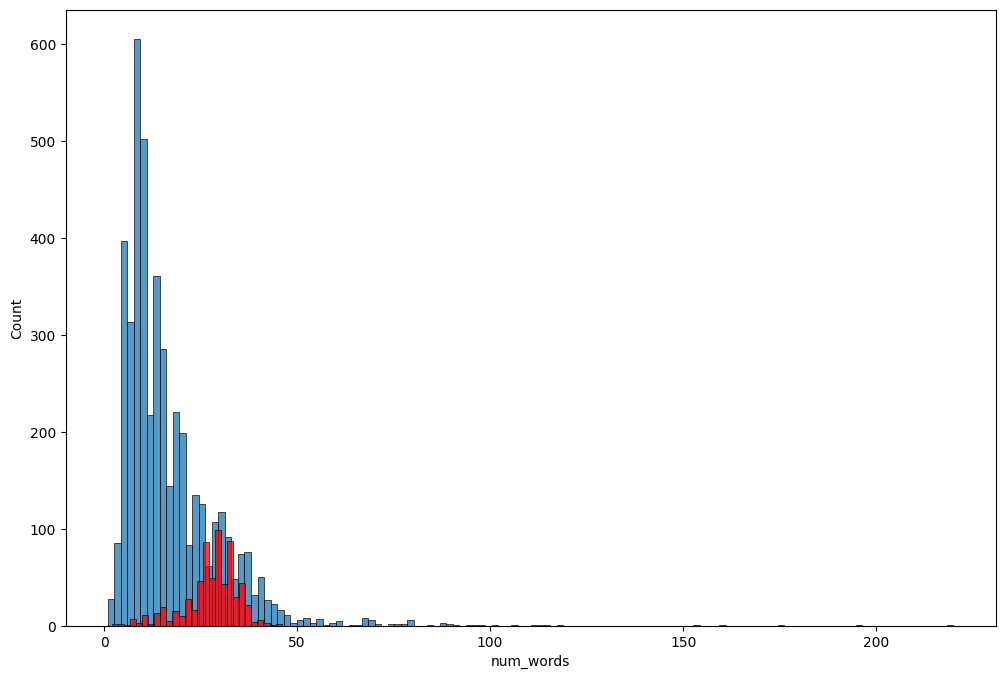

In [32]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

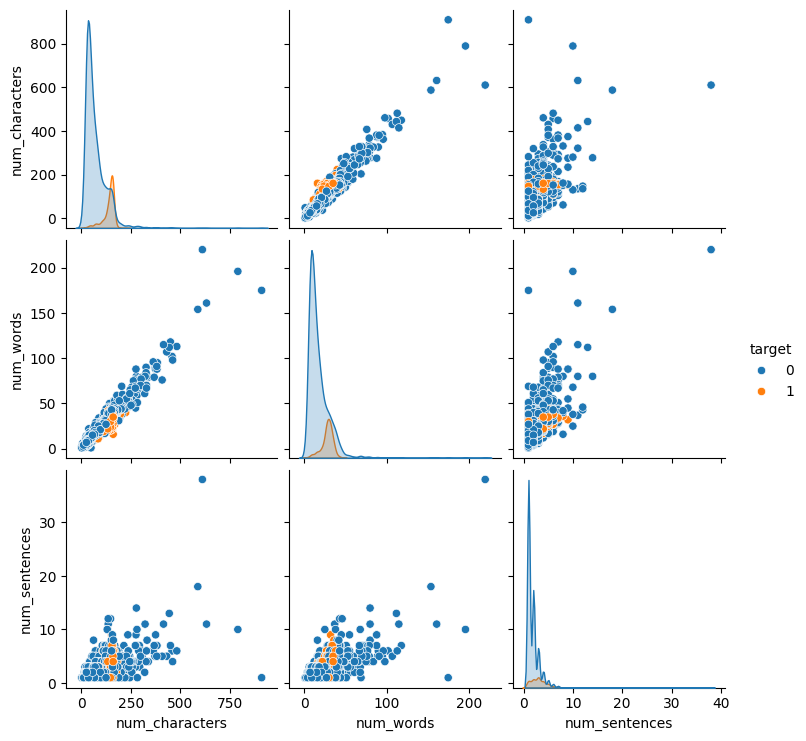

In [33]:
sns.pairplot(df,hue='target')

<Axes: >

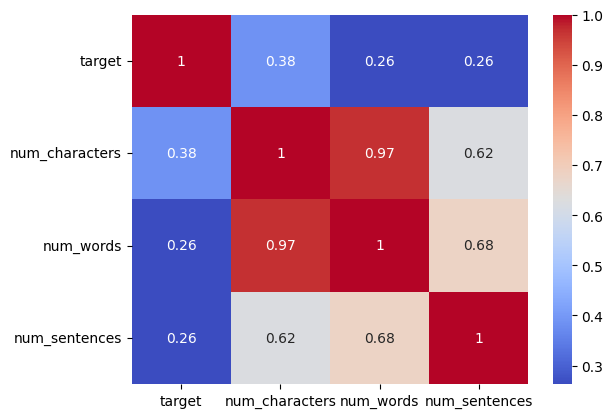

In [34]:
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')


In [35]:
# multicollinearity between columns : only num_characters column will be taken as it has high correlation with target ( also to avoid multicollinearity)

In [36]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


## 2.Data Preprocessing



In [37]:
#import string

In [38]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from string import punctuation
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')


'love'

In [39]:
import string
def text_transfrom(text):
    text=text.lower()
    text=word_tokenize(text)

    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)

    text=y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text=y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    text=y[:]
    
    return " ".join(y)
    

In [40]:
text_transfrom('Hi how are YOU#$$%%  myself loving Hi')

'hi love hi'

In [41]:
df['transfromed_text'] = df['text'].apply(text_transfrom)

In [42]:
df.head()

,target,text,num_characters,num_words,num_sentences,transfromed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [43]:
!pip install wordcloud




[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [44]:
from wordcloud import WordCloud
wc = WordCloud(width=500 ,height=500, min_font_size=10, background_color='white')

In [45]:
spam_wc = wc.generate(df[df['target'] == 1]['transfromed_text'].str.cat(sep=" "))

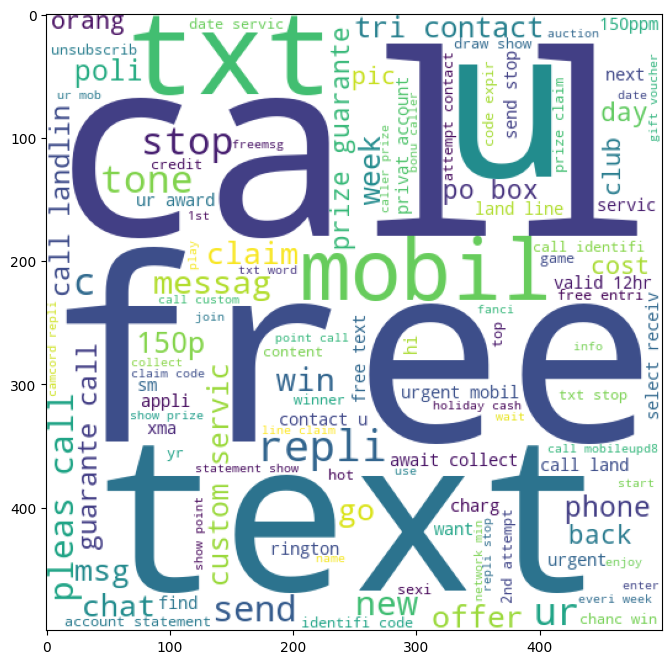

In [46]:
plt.figure(figsize=(12,8))
plt.imshow(spam_wc)

In [47]:
ham_wc = wc.generate(df[df['target'] == 0]['transfromed_text'].str.cat(sep=" "))

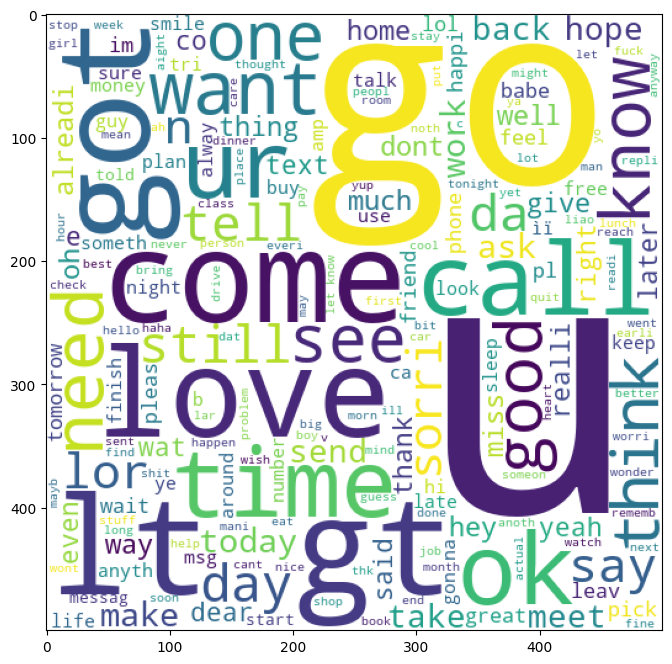

In [48]:
plt.figure(figsize=(12,8))
plt.imshow(ham_wc)

In [49]:
df.head()

,target,text,num_characters,num_words,num_sentences,transfromed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [50]:
spam_corpus = []
for msg in df[df['target'] == 1]['transfromed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
    

In [51]:
len(spam_corpus)

9939

In [52]:
from collections import Counter
df_1 = pd.DataFrame(Counter(spam_corpus).most_common(30), columns = ["0","1"])
df_1



,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


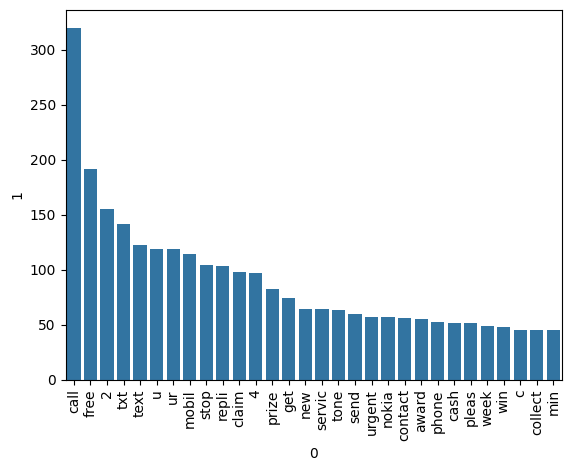

In [53]:
sns.barplot(x="0", y="1", data=df_1)
plt.xticks(rotation="vertical")
plt.show()

In [54]:
ham_corpus = []
for msg in df[df['target'] == 0]['transfromed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)
    

In [55]:
from collections import Counter
df_2 = pd.DataFrame(Counter(ham_corpus).most_common(30), columns = ["0","1"])
df_2


,0,1
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


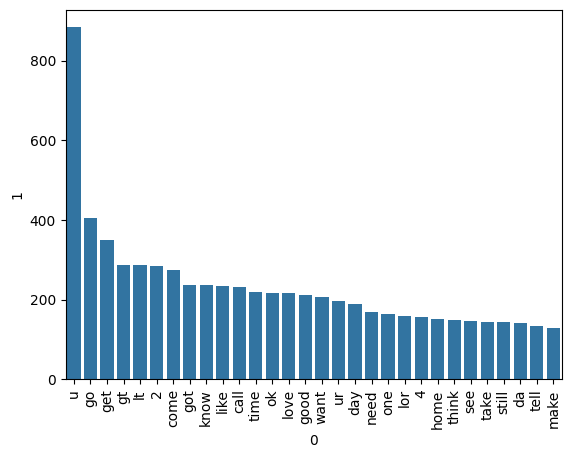

In [56]:
sns.barplot(x="0", y="1", data=df_2)
plt.xticks(rotation="vertical")
plt.show()

## 4. Model Building


In [57]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features = 3000)

In [58]:
X = tfidf.fit_transform(df['transfromed_text']).toarray()

In [59]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [60]:
X.shape


(5169, 3000)

In [61]:
y = df['target'].values

In [62]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 2)

In [65]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [66]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [67]:
gnb.fit(X_train,y_train)
y_pred = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.874274661508704
[[790 106]
 [ 24 114]]
0.5181818181818182


In [68]:
mnb.fit(X_train,y_train)
y_pred1 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [69]:
bnb.fit(X_train,y_train)
y_pred2 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [70]:
# tfidf-->mnb

In [71]:
!pip install xgboost



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier


In [73]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
lrc = LogisticRegression(solver='liblinear', penalty='l1')
dtc = DecisionTreeClassifier(max_depth = 5)
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
gbc = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)
mnb = MultinomialNB()

In [74]:
clfs = {
    'SVC' : svc,
    'KNC' : knc,
    'LR' : lrc,
    'DT' : dtc,
    'RF' : rfc,
    'AdaBoost' : abc,
    'ETC' : etc,
    'GBC' : gbc,
    'BGC' : bc,
    'XGB' : xgb,
    'MNB' : mnb
}



In [75]:
def train_classifier(clf,X_train,X_test,y_train,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    return (accuracy,precision)

In [79]:
train_classifier(svc,X_train,X_test,y_train,y_test)

(0.9758220502901354, 0.9747899159663865)

In [80]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    current_accuracy,current_precision = train_classifier(clf,X_train,X_test,y_train,y_test)
    
    print("For", name)
    print("accuracy -" ,current_accuracy)
    print("precision -" ,current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)


For SVC
accuracy - 0.9758220502901354
precision - 0.9747899159663865
For KNC
accuracy - 0.9052224371373307
precision - 1.0
For LR
accuracy - 0.9555125725338491
precision - 0.96
For DT
accuracy - 0.9342359767891683
precision - 0.85
For RF
accuracy - 0.9738878143133463
precision - 0.9826086956521739
For AdaBoost
accuracy - 0.9216634429400387
precision - 0.8202247191011236
For ETC
accuracy - 0.9748549323017408
precision - 0.9745762711864406
For GBC
accuracy - 0.9506769825918762
precision - 0.9306930693069307
For BGC
accuracy - 0.9584139264990329
precision - 0.8682170542635659
For XGB
accuracy - 0.965183752417795
precision - 0.9396551724137931
For MNB
accuracy - 0.9709864603481625
precision - 1.0


In [81]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys() , 'Accuracy' : accuracy_scores , 'Precision' : precision_scores}).sort_values('Precision',ascending = False)

In [82]:
performance_df

,Algorithm,Accuracy,Precision
1,KNC,0.905222,1.000000
10,MNB,0.970986,1.000000
4,RF,0.973888,0.982609
0,SVC,0.975822,0.974790
6,ETC,0.974855,0.974576
2,LR,0.955513,0.960000
9,XGB,0.965184,0.939655
7,GBC,0.950677,0.930693
8,BGC,0.958414,0.868217
3,DT,0.934236,0.850000


In [83]:
performance_df1 = pd.melt(performance_df, id_vars = 'Algorithm')

In [84]:
performance_df1

,Algorithm,variable,value
0,KNC,Accuracy,0.905222
1,MNB,Accuracy,0.970986
2,RF,Accuracy,0.973888
3,SVC,Accuracy,0.975822
4,ETC,Accuracy,0.974855
5,LR,Accuracy,0.955513
6,XGB,Accuracy,0.965184
7,GBC,Accuracy,0.950677
8,BGC,Accuracy,0.958414
9,DT,Accuracy,0.934236


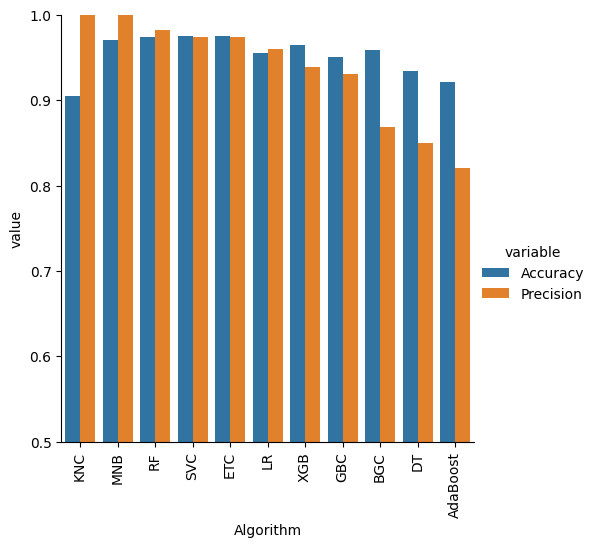

In [85]:
sns.catplot(x = 'Algorithm',y = 'value' ,hue = 'variable' ,data = performance_df1, kind = 'bar', height = 5)
plt.ylim(0.5,1.0)
plt.xticks(rotation = 'vertical')
plt.show()


In [86]:
#import pickle

In [87]:

pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))
            